# CFD笔记
## 常微分方程两点边值问题的差分解法
1. 计算两点边值问题
$$ -u^{''}(x) + u(x) = e^{x}(sin(x) - 2cos(x)), \quad 0 \leq x \leq \pi,$$
$$ u(0) = 0, \quad u(\pi) = 0. $$
该定解问题的精确解为 $u(x) = e^{x}sin(x)$.

解：将区间 $[0,\pi]$ 作 $m$ 等分，记 $h=\pi/m, x_{i}=ih, 0\leq i\leq m$. 构造差分格式如下
$$ -\delta_{x}^{2}u_{i} + u_{i} = e^{x_{i}}(sin(x_{i}) - 2 cos(x_{i})), \quad 1\leq i \leq m-1 $$
$$ u_{0} = 0,\quad u_{m} = 0. $$

In [2]:
import numpy as np

def f(x):
    return np.exp(x)*(np.sin(x)-2*np.cos(x))

def solve(m):
    h = np.pi / m
    u = np.zeros(m+1)
    g = np.zeros(m+1)
    w = np.zeros(m+1)
    
    for i in range(1,m):
        x_i = i * h
        g[i] = (h**2 * f(x_i) + g[i-1]) / (h**2 + 2 + w[i-1])
        w[i] = -1 / (2+h**2 + w[i-1])
    u[m] = g[m]
    for i in range(0,m-1):
        j = m - i - 1
        u[j] = g[j] - w[j]*u[j+1]
    return u

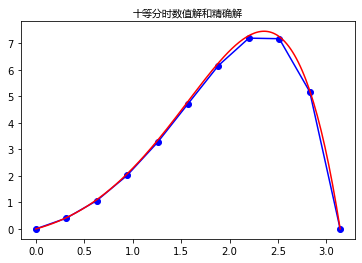

In [3]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
font1 = FontProperties(fname='/usr/share/fonts/msyh.ttc')

m = 10
u = solve(m)
x = np.linspace(0,np.pi,m+1)
plt.plot(x, u,'b')
plt.plot(x, u,'bo')
x = np.linspace(0,np.pi,161)
plt.plot(x, np.exp(x)*np.sin(x),'r')
plt.title('十等分时数值解和精确解', fontproperties=font1)
plt.show()

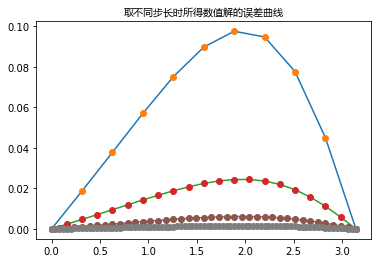

In [4]:
for m in [10,20,40,80]:
    u = solve(m)
    x = np.linspace(0,np.pi,m+1)
    ue = np.exp(x)*np.sin(x)
    err = np.abs(u - ue)
    plt.plot(x,err)
    plt.plot(x,err,'o')
plt.title('取不同步长时所得数值解的误差曲线', fontproperties=font1)
plt.show()

### 外推法
用外推法计算上述算例的最大误差，最大误差定义如下
$$ \hat{E}_{\infty}(h) = \max_{1\leq i \leq m-1}\left\vert u(x_{i}) - \left[\frac{4}{3}u_{2i}\left(\frac{h}{2}\right) - \frac{1}{3}u_{i}(h)\right] \right\vert. $$

In [5]:
def u(x):
    return np.exp(x)*np.sin(x)

def hat_E_infty(m):
    h = np.pi / m
    ui = solve(m)
    u2i = solve(2*m)
    E = 0.0
    for i in range(1,m):
        E = max(E, abs(u(i*h) - (4/3*u2i[i*2]-1/3*ui[i])))
    return E

for m in [10,20,40,80,160,320]:
    E1 = hat_E_infty(m)
    E2 = hat_E_infty(int(m/2))
    print("m=",m,E1,E2,E2/E1)

m= 10 0.00010092295123165229 0.0014295770061831803 14.165033708752906
m= 20 6.846439692509421e-06 0.00010092295123165229 14.740939198233276
m= 40 4.30753650526583e-07 6.846439692509421e-06 15.894095579085308
m= 80 2.696608270014167e-08 4.30753650526583e-07 15.973905268944383
m= 160 1.6859154072790261e-09 2.696608270014167e-08 15.994920376024934
m= 320 9.256684307956675e-11 1.6859154072790261e-09 18.212951324589095


## 抛物型方程的差分解法
### 向前 Euler 格式
1. 应用向前 Euler 格式计算定解问题
\begin{align}
& \frac{\partial u}{\partial t} - \frac{\partial^{2} u}{\partial x^{2}} = 0, \quad  0 < x < 1,\quad 0 < t \leq 1, \\
& u(x,0) = e^{x},\quad  0 \leq x \leq 1, \\
& u(0,t) = e^{t}, \quad  u(1,t) = e^{1+t}, \quad 0 < t \leq 1.
\end{align}
上述定解问题的精确解为 $u(x,t) = e^{x+t}$.

In [6]:
import numpy as np
def solve(m,n):
    h = 1.0/m   #空间步长
    tau = 1.0/n #时间步长
    r = 1.0 * m**2 / n #步长比
    u = np.zeros((n+1,m+1))
    for i in range(0,m+1):
        u[0][i] = np.exp(i*h)
        
    for k in range(1,n+1):
        u[k][0] = np.exp(k*tau)
        u[k][m] = np.exp(1+k*tau)
        for j in range(1,m):
            u[k][j] = r*u[k-1][j-1] + (1.0-2*r)*u[k-1][j] + r * u[k-1][j+1]
    return u

m = 10
n = 200
u = solve(m,n)

print('k','(x,t)','数值解','精确解','误差')
for k in range(20,n+1,20):
    print(k,'(0.5,'+str(k*1.0/n)+')',u[k][5],np.exp(0.5+k*1.0/n),abs(np.exp(0.5+k*1.0/n)-u[k][5]))    

k (x,t) 数值解 精确解 误差
20 (0.5,0.1) 1.8218887237735508 1.8221188003905089 0.0002300766169580637
40 (0.5,0.2) 2.0134090979348165 2.0137527074704766 0.00034360953566014985
60 (0.5,0.3) 2.225128435635512 2.225540928492468 0.0004124928569559927
80 (0.5,0.4) 2.459135233336683 2.45960311115695 0.00046787782026669333
100 (0.5,0.5) 2.717760343973218 2.718281828459045 0.0005214844858270062
120 (0.5,0.6) 3.003588081837267 3.0041660239464334 0.0005779421091665071
140 (0.5,0.7) 3.3194776068280007 3.3201169227365472 0.0006393159085464895
160 (0.5,0.8) 3.668589897606338 3.6692966676192444 0.0007067700129064214
180 (0.5,0.9) 4.054418785763932 4.0551999668446745 0.0007811810807423214
200 (0.5,1.0) 4.480825702616132 4.4816890703380645 0.0008633677219327396


In [8]:
import matplotlib
%matplotlib auto
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
#from Ipython import display
# 解决中文乱码问题
myfont = fm.FontProperties(fname='/usr/share/fonts/msyh.ttc', size=14)
matplotlib.rcParams["axes.unicode_minus"] = False
# 生成画布
plt.figure(figsize=(8, 6), dpi=80)

for k in range(0,n+1):
    # 清除原有图像
    plt.cla()
    
    plt.title('time='+str(1.0/n*k))
    # 设置X轴
    plt.xlabel("X轴", fontproperties=myfont)
    plt.xlim(0, 1)
    plt.xticks(np.linspace(0, 1, 11, endpoint=True))

    # 设置Y轴
    plt.ylabel("Y轴，速度 u 大小", fontproperties=myfont)
    plt.ylim(0, 10)
    plt.yticks(np.linspace(0, 10, 11, endpoint=True))
    x = np.linspace(0,1,m+1)
    l1, = plt.plot(x, u[k], "bo--", label='Numerical solution')
    l2, = plt.plot(x, np.exp(x+1.0/n*k), "r", label='Analytical solution')
    
    plt.legend(handles=[l1,l2])
    plt.pause(0.01)

Using matplotlib backend: Qt5Agg


### 向后 Euler 格式
向后 Euler 格式在每一个时间层上解一个三对角线性方程组。对于三对角方程组可采用追赶法（又称为 Thomas 算法）求解。代码类似常微分方程两点边值问题的差分解法，略。
#### Remark. 
在向前 Euler 格式中步长比 r > 1/2 是不稳定的，而在向后 Euler 中，对任意步长比都是稳定的。

### Grank-Nicolson 格式
向前 Euler 格式和向后 Euler 格式的收敛阶均为 $O(\tau + h^{2})$，即关于时间步长是一阶的，关于空间步长是二阶的。 Richardson 格式应用中心差商的思想，可以把关于时间的精度提到二阶，但是 Richardson 格式是一个完全不稳定的差分格式，随计算层数的增加，误差越来越大。Grank-Nicolson 格式同样可以将时间精度提高到二阶，并且是无条件稳定的差分格式。

## 二维抛物型方程的交替方向隐格式

用 D'Yakonov 交替方向隐格式计算定解问题
\begin{align}
    & \frac{\partial u}{\partial t} - \left( \frac{\partial^{2}u}{\partial x^{2}}+ \frac{\partial^{2}u}{\partial y^{2}}\right) = -\frac{3}{2} e^{\frac{x+y}{2}}-t,\ 0 < x,y < 1, 0 < t \leq 1, \\
    & u(x,y,0) = e^{\frac{x+y}{2}},\ 0 < x,y < 1, \\
    & u(0,y,t) = e^{\frac{y}{2}-t}, \ u(1,y,t) = e^{\frac{1+y}{2}-t},\ 0 \leq y \leq 1, \ 0 \leq t \leq 1, \\
    & u(x,0,t) = e^{\frac{x}{2}-t}, \ u(x,1,t) = e^{\frac{1+x}{2}-t},\ 0 < x < 1, \ 0 \leq t \leq 1. \\
\end{align}
该问题的精确解为 $u(x,y,t)=e^{\frac{x+y}{2}-t}$.

In [51]:
import numpy as np
def Thomas_algorithm(alpha,beta,gamma,d,l,n):
    g = np.zeros(n-l+1)
    w = np.zeros(n-l+1)
    for i in range(l,n+1):
        if i == l:
            g[i-l] = d[l]/beta[l]
            w[i-l] = gamma[l]/beta[l]
        else:
            g[i-l] = (d[i]-alpha[i]*g[i-l-1])/(beta[i]-alpha[i]*w[i-l-1])
            w[i-l] = gamma[i]/(beta[i]-alpha[i]*w[i-l-1])
    u = np.zeros(n-l+1)
    for i in range(l,n+1):
        if i == l:
            u[n-i] = g[n-i]
        else:
            u[n-i] = g[n-i] - w[n-i]*u[n-i+1]
    return u

def delta_x_square(i,j,k,h,u):
    return (u[i+1][j][k-1] + u[i-1][j][k-1] - 2*u[i][j][k-1])/h/h

def delta_y_square(i,j,k,h,u):
    return u[i][j+1][k-1]/h/h + u[i][j-1][k-1]/h/h - 2*u[i][j][k-1]/h/h

def delta_x_square_y_square(i,j,k,h,u):
    return delta_x_square(i,j+1,k,h,u)/h/h + delta_x_square(i,j-1,k,h,u)/h/h \
                - 2*delta_x_square(i,j,k,h,u)/h/h

def solve(m,n):
    '''
        return u(x,y,t) with the size of (m+1)*(m+1)*(n+1)
    '''
    h = 1.0/m
    tau = 1.0/n
    u = np.zeros((m+1,m+1,n+1))
    for i in range(0,m+1):
        for j in range(0,m+1):
            u[i][j][0] = np.exp(0.5*(i*h+j*h))
            
    u_star = np.zeros((m+1,m+1))
    for k in range(0,n):
        for j in range(0,m+1):
            u[0][j][k+1] = np.exp(j*h/2.0-tau*(k+1))
            u[m][j][k+1] = np.exp((1+j*h)/2.0-tau*(k+1))
        # u_star boundary condition
        for j in range(1,m):
            u_star[0][j] = u[0][j][k+1] - delta_y_square(0,j,k+1,h,u)*tau/2.0
            u_star[m][j] = u[m][j][k+1] - delta_y_square(m,j,k+1,h,u)*tau/2.0
        for j in range(1,m):
            alpha = np.array([-tau/h/h/2.0]*(m+1))
            alpha[1] = 0.0
            beta = np.array([1 + tau/h/h]*(m+1))
            gamma = np.array([-tau/h/h/2.0]*(m+1))
            gamma[m-1] = 0.0
            d = np.zeros(m+1)
            d[1:m] = np.array([-3/2*np.exp((j+i)*h/2-tau*k)*tau + u[i][j][k] \
                          + delta_x_square(i,j,k,h,u)*tau/2 + delta_y_square(i,j,k,h,u)*tau/2 \
                          + delta_x_square_y_square(i,j,k,h,u)*tau*tau/4 for i in range(1,m)])
            d[1] = d[1] + tau/h/h/2*u_star[0][j]
            d[m-1] = d[m-1] + tau/h/h/2*u_star[m][j]
            u_star[1:m,j] = Thomas_algorithm(alpha,beta,gamma,d,1,m-1)
            
        for i in range(1,m):
            u[i][0][k+1] = np.exp(i*h/2.0-tau*(k+1))
            u[i][m][k+1] = np.exp((1+i*h)/2.0-tau*(k+1))
        for i in range(1,m):
            alpha = np.array([-tau/h/h/2.0]*(m+1))
            alpha[1] = 0.0
            beta = np.array([1 + tau/h/h]*(m+1))
            gamma = np.array([-tau/h/h/2.0]*(m+1))
            gamma[m-1] = 0.0
            d = np.array([u_star[i][j] for j in range(0,m+1)])
            d[1] = d[1] + tau/h/h/2*u[i][0][k+1]
            d[m-1] = d[m-1] + tau/h/h/2*u[i][m][k+1]
            u[i,1:m,k+1] = Thomas_algorithm(alpha,beta,gamma,d,1,m-1)
    return u

In [56]:
u = solve(100,100)
M = np.max(u)
m = np.min(u)
print(m,M)

0.36787944117144233 2.718281828459045


In [84]:
import taichi as ti
import numpy as np
import matplotlib
%matplotlib auto
import matplotlib.cm as cm
import matplotlib.pyplot as plt

for k in range(101):
    ## color map
    colors = [(1, 1, 0), (0.953, 0.490, 0.016), (0, 0, 0),(0.176, 0.976, 0.529), (0, 1, 1)]
    my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list(
                'my_cmap', colors)
    img = cm.ScalarMappable(norm=matplotlib.colors.Normalize(
                vmin=0, vmax=3),cmap=my_cmap).to_rgba(u[:,:,k])
    im = plt.imshow(img)
    #plt.colorbar(im)
    plt.pause(0.01)

Using matplotlib backend: Qt5Agg


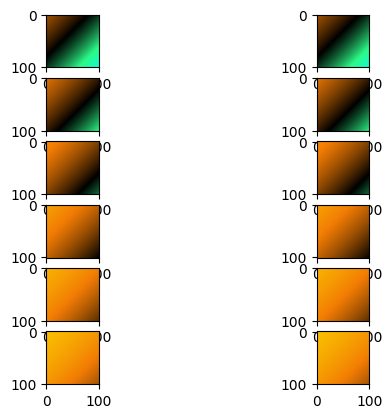

In [143]:
import numpy as np
import matplotlib
import matplotlib.cm as cm
import matplotlib.pyplot as plt

fig, ax = plt.subplots(6,2)
im = []
for k in range(0,6):
    colors = [(1, 1, 0), (0.953, 0.490, 0.016), (0, 0, 0),(0.176, 0.976, 0.529), (0, 1, 1)]
    my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list('my_cmap', colors)
    img = cm.ScalarMappable(norm=matplotlib.colors.Normalize(
                vmin=0, vmax=3),cmap=my_cmap).to_rgba(u[:,:,k*20])
    ax[k][0].imshow(img)
        
    u_ = np.zeros((101,101))
    for i in range(0,101):
        for j in range(0,101):
            u_[i][j] = np.exp((i/100.0+j/100.0)/2-k*20/100)
    img2 = cm.ScalarMappable(norm=matplotlib.colors.Normalize(
                vmin=0, vmax=3),cmap=my_cmap).to_rgba(u_)
    ax[k][1].imshow(img2)
fig

In [152]:
print('(x,y,t) 数值解 精确解 |数值解-精确解|')
for i in [25,75]:
    for j in [25,75]:
        for k in [25,75,100]:
            print('({},{},{})'.format(i,j,k),u[i][j][k],np.exp((i+j)/100.0/2-k/100.0),np.abs(u[i][j][k]-np.exp((i+j)/100.0/2-k/100.0)))            

(x,y,t) 数值解 精确解 |数值解-精确解|
(25,25,25) 0.9997165425254023 1.0 0.00028345747459768145
(25,25,75) 0.6063657316843709 0.6065306597126334 0.00016492802826251207
(25,25,100) 0.4722381073199757 0.4723665527410147 0.00012844542103901402
(25,75,25) 1.2837066963705739 1.2840254166877414 0.00031872031716750904
(25,75,75) 0.7786136748610287 0.7788007830714049 0.00018710821037615233
(25,75,100) 0.6063849405134848 0.6065306597126334 0.00014571919914863063
(75,25,25) 1.2837057597027894 1.2840254166877414 0.0003196569849519548
(75,25,75) 0.7786131023405167 0.7788007830714049 0.00018768073088815118
(75,25,100) 0.6063844948311071 0.6065306597126334 0.00014616488152630058
(75,75,25) 1.6483586465016544 1.6487212707001282 0.00036262419847377103
(75,75,75) 0.9997854424862971 1.0 0.00021455751370291765
(75,75,100) 0.778633686695424 0.7788007830714049 0.00016709637598089078
